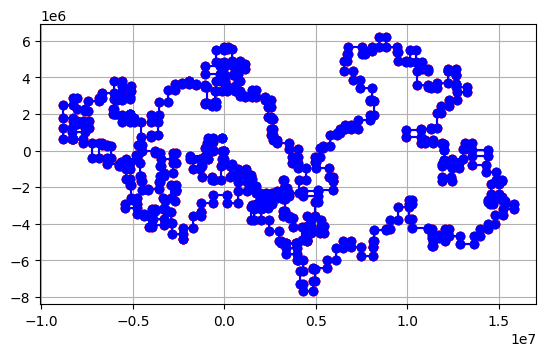

In [68]:
import re
import numpy as np
import matplotlib.pyplot as plt

with open('input.txt') as f:
    lines = f.readlines()

def get_parts(s: str) -> tuple[str, int, str]:
    m = re.match(r'^(R|L|U|D) ([0-9]+) \((#[a-z0-9]{6})\)$', s)
    return (m.group(1), int(m.group(2)), m.group(3))   

instructions = [get_parts(s) for s in lines]
instructions = [(int(hexrepr[1:-1], 16), int(hexrepr[-1])) for _, _ , hexrepr in instructions]
# instructions = [(dist, 0 if direction == 'R' else 1 if direction == 'D' else 2 if direction == 'L' else 3) for direction, dist, _ in instructions]

points = [(0, 0)]
for (distance, direction) in instructions:
    match direction:
        case 0:
            points.append((points[-1][0] + distance, points[-1][1]))
        case 1:
            points.append((points[-1][0], points[-1][1] - distance))
        case 2:
            points.append((points[-1][0] - distance, points[-1][1]))
        case 3:
            points.append((points[-1][0], points[-1][1] + distance))

def normalize(vector):
    return vector / np.linalg.norm(vector)

vertices = [(-0.5,0.5)]
number_of_vertices = len(points) - 1
distance_to_add = np.sqrt(0.5)
for i in range(1, number_of_vertices):
    prev_vertex = points[i - 1]
    current_vertex = points[i]
    next_vertex = points[(i + 1) % number_of_vertices]
    
    edge1 = np.array(current_vertex) - np.array(prev_vertex)
    edge2 = np.array(next_vertex) - np.array(current_vertex)
    
    edge1_normalized = normalize(edge1)
    edge2_normalized = normalize(edge2)
    
    normal1 = np.array([-edge1_normalized[1], edge1_normalized[0]])
    normal2 = np.array([-edge2_normalized[1], edge2_normalized[0]])
    
    outward_direction = normalize(normal1 + normal2)
    offset = outward_direction * distance_to_add
    
    new_vertex = np.array(current_vertex) + offset
    vertices.append(new_vertex)
vertices.append((-0.5,0.5))
            
    
for (x1, y1), (x2, y2) in zip(points, points[1:]):
    plt.plot([x1, x2], [y1, y2], 'ro-')
    
plt.plot([x for x, _ in vertices], [y for _, y in vertices], 'bo-')

plt.grid()
# plt.gca().set_xticks(np.arange(-1.5,7.5, 1), minor=False)
# plt.gca().set_yticks(np.arange(-10.5,2.5, 1), minor=False)
# plt.gca().set_xlim(-1.5, 7.5)
plt.gca().set_aspect('equal', adjustable='box')

In [69]:
coordinates = np.array(vertices[::-1])

x = coordinates[:, 0]
y = coordinates[:, 1]

# Shifted indices for the formula (wrap around)
x_next = np.roll(x, -1)
y_next = np.roll(y, -1)

# Shoelace formula
area = 0.5 * np.sum((y + y_next) * (x_next - x))
print(area)

-129373230480516.0
